In [1]:
"""Creating a model using Simple Linear Regression algorithm to predict "The number of future complaints" (of the top complaint type)"""

'Creating a model using Simple Linear Regression algorithm to predict "The number of future complaints" (of the top complaint type)'

In [2]:
#Step 1 - Importing all required libraries

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Step 2 - Creating a pandas dataframe "df_311nyc_model_1" with only 2 columns from the data available in csv format

In [5]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51a3837687ca424c88d81a9214afdc84 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<replace_with_your_ibm_api_key_id>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='<replace_with_your_bucket_id>',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311nyc_model_1 = pd.read_csv(body, usecols = ["created_date", "complaint_type"], parse_dates = ["created_date"])
df_311nyc_model_1.head()


,created_date,complaint_type
0,2019-09-01 17:14:28,UNSANITARY CONDITION
1,2019-09-01 14:31:35,GENERAL
2,2019-09-01 20:28:51,HEAT/HOT WATER
3,2019-09-01 11:54:18,WATER LEAK
4,2019-09-01 14:53:00,HEAT/HOT WATER


In [6]:
#Step 3 - Calculating the total number of complaints for each complaint type

In [7]:
df_311nyc_model_1["complaint_type"].value_counts()

HEAT/HOT WATER            1150569
HEATING                    887869
PLUMBING                   702389
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       435768
PAINT - PLASTER            361258
PAINT/PLASTER              340979
ELECTRIC                   303314
NONCONST                   260890
DOOR/WINDOW                199690
WATER LEAK                 187264
GENERAL                    146066
FLOORING/STAIRS            135257
APPLIANCE                  109605
HPD Literature Request      52830
SAFETY                      49975
OUTSIDE BUILDING             7018
ELEVATOR                     6421
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

In [8]:
#Step 4 - To consider both HEAT/HOT WATER and HEATING complaints for this problem, replacing values HEATING with HEAT/HOT WATER

In [9]:
df_311nyc_model_1["complaint_type"] = np.where(df_311nyc_model_1["complaint_type"]=='HEATING','HEAT/HOT WATER',df_311nyc_model_1["complaint_type"])

In [10]:
# Step 5 - Calculating again the total number of complaints for each complaint type

In [11]:
df_311nyc_model_1["complaint_type"].value_counts()

HEAT/HOT WATER            2038438
PLUMBING                   702389
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       435768
PAINT - PLASTER            361258
PAINT/PLASTER              340979
ELECTRIC                   303314
NONCONST                   260890
DOOR/WINDOW                199690
WATER LEAK                 187264
GENERAL                    146066
FLOORING/STAIRS            135257
APPLIANCE                  109605
HPD Literature Request      52830
SAFETY                      49975
OUTSIDE BUILDING             7018
ELEVATOR                     6421
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complaint_type, dtype: int64

In [12]:
#Step 6 - Creating a sub dataframe "df_311nyc_top_complaint" that contains only samples with top complaint type i.e. HEAT/HOT WATER, from the main dataframe "df_311nyc_model_1"

In [13]:
df_311nyc_top_complaint = df_311nyc_model_1[df_311nyc_model_1["complaint_type"]=="HEAT/HOT WATER"].reset_index(drop=True)
df_311nyc_top_complaint.head()

,created_date,complaint_type
0,2019-09-01 20:28:51,HEAT/HOT WATER
1,2019-09-01 14:53:00,HEAT/HOT WATER
2,2019-09-01 10:53:21,HEAT/HOT WATER
3,2019-09-01 22:54:58,HEAT/HOT WATER
4,2019-09-01 20:35:02,HEAT/HOT WATER


In [14]:
#Step 7 - Creating a time series to get and analyze data with respect to every year, summed upon each month

In [15]:
time_series = pd.Series(1, index = df_311nyc_top_complaint['created_date'])
time_series = time_series.resample('M').sum()
time_series.head(12)

created_date
2010-01-31    40213
2010-02-28    24616
2010-03-31    17621
2010-04-30     9779
2010-05-31     5940
2010-06-30     1958
2010-07-31     1717
2010-08-31     1912
2010-09-30     2201
2010-10-31    19525
2010-11-30    37305
2010-12-31    51431
Freq: M, dtype: int64

In [16]:
#Step 8 - Plotting a "line diagram" to analyze occurance of top complaint type across every year

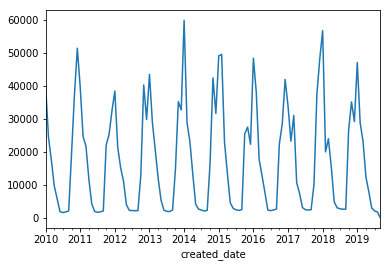

In [17]:
import matplotlib.pyplot as plt
time_series.plot(kind='line')

In [18]:
"""From the graph above, we can conclude that number of top complaint type i.e. HEAT/HOT WATER increases at
start of an year i.e. during winters and decreses after mid-year i.e. during summers"""

'From the graph above, we can conclude that number of top complaint type i.e. HEAT/HOT WATER increases at\nstart of an year i.e. during winters and decreses after mid-year i.e. during summers'

In [19]:
#Step 9 - Calculating the total number of top complaint type per year

In [20]:
df_group = df_311nyc_top_complaint.groupby(df_311nyc_top_complaint.created_date.dt.year)

In [21]:
#Step 10 - Converting the GroupByObject to Dataframe

In [22]:
df_model_1 = df_group["complaint_type"].size().to_frame().reset_index()
df_model_1

,created_date,complaint_type
0,2010,214218
1,2011,190184
2,2012,182974
3,2013,202896
4,2014,230364
5,2015,225706
6,2016,227959
7,2017,213521
8,2018,223835
9,2019,126781


In [23]:
#Step 11 - Checking the "type" to confirm if conversion is successfully completed

In [24]:
type(df_model_1)

pandas.core.frame.DataFrame

In [25]:
#Step 12 - Removing complaints from year 2019 as it only contains data till September 2019 and not for the whole year

In [26]:
df_model_1.drop(df_model_1.tail(1).index,inplace=True)
df_model_1

,created_date,complaint_type
0,2010,214218
1,2011,190184
2,2012,182974
3,2013,202896
4,2014,230364
5,2015,225706
6,2016,227959
7,2017,213521
8,2018,223835


In [27]:
#Step 13 - Plotting a "bar graph" to visually analyze distribution of data i.e. top complaints across the years 2010 - 2018

Text(0.5, 1.0, 'Total Complaints Per Year')

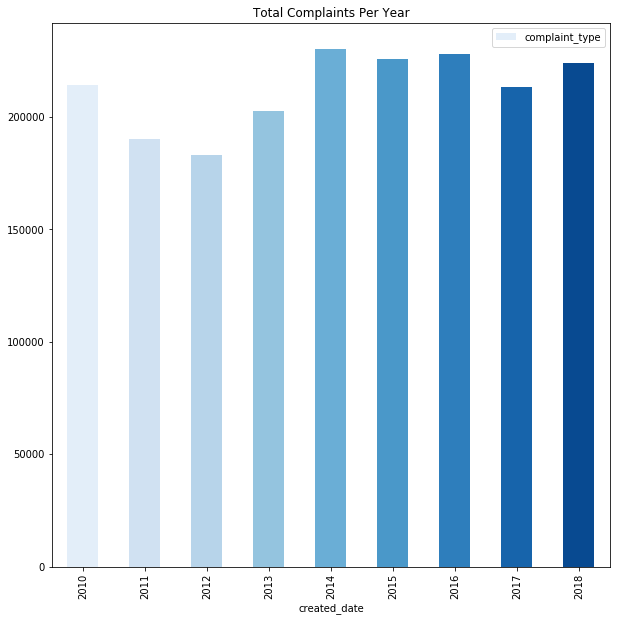

In [28]:
df_model_1.plot(x="created_date", y="complaint_type", kind="bar", figsize = (10,10), color=sns.color_palette("Blues", len(df_model_1)))
plt.title('Total Complaints Per Year')

In [29]:
#Step 14 - Creating set of predictor x and target y variables

In [30]:
x = df_model_1["created_date"]
y = df_model_1["complaint_type"]

In [31]:
#Step 15 - Preprocessing predictor data for modelling

In [32]:
x = np.asarray(x)

In [33]:
x = x.reshape(-1, 1)

In [34]:
#Step 16 - Defining and fitting the model

In [35]:
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression()
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#Step 17 - Using the trained model to predict total number of complaints that department can expect for the year 2019

In [37]:
linear_reg.predict([[2019]])

array([230844.58333333])

In [38]:
"""Conclusion: A simple model can be created based on historic data available, to predict the number of future complaints
using Linear Regression Algorithm as we are trying to predict a continuous value (number of complaints) based on single variable (date)."""

'Conclusion: A simple model can be created based on historic data available, to predict the number of future complaints\nusing Linear Regression Algorithm as we are trying to predict a continuous value (number of complaints) based on single variable (date).'

In [39]:
"""Creating a predictive model using Decision Tree Classification algorithm to estimate the probability/possibility of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house."""

'Creating a predictive model using Decision Tree Classification algorithm to estimate the probability/possibility of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.'

In [40]:
#Step 1 - Creating a pandas dataframe "df_311nyc_model_2" with only 2 columns from the data available in csv format

In [41]:
body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='edx-donotdelete-pr-eroq0nxwstcsdh',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311nyc_model_2 = pd.read_csv(body, usecols = ["incident_address","complaint_type"])
df_311nyc_model_2.head()


,complaint_type,incident_address
0,UNSANITARY CONDITION,97-05 HORACE HARDING EXPRESSWAY
1,GENERAL,110 ROCHESTER AVENUE
2,HEAT/HOT WATER,271 HAWTHORNE STREET
3,WATER LEAK,2714 WALLACE AVENUE
4,HEAT/HOT WATER,271 HAWTHORNE STREET


In [42]:
#Step 2 - Identifying unique values for the column complaint_type

In [43]:
df_311nyc_model_2["complaint_type"].unique()

array(['UNSANITARY CONDITION', 'GENERAL', 'HEAT/HOT WATER', 'WATER LEAK',
       'PLUMBING', 'ELECTRIC', 'SAFETY', 'DOOR/WINDOW', 'PAINT/PLASTER',
       'FLOORING/STAIRS', 'ELEVATOR', 'APPLIANCE', 'General',
       'Unsanitary Condition', 'OUTSIDE BUILDING', 'Safety', 'Appliance',
       'Mold', 'Plumbing', 'HPD Literature Request', 'PAINT - PLASTER',
       'HEATING', 'GENERAL CONSTRUCTION', 'Outside Building', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT'],
      dtype=object)

In [44]:
"""Coverting multi-label data of the column complaint_type to binary in order to create a model that predicts the "Probabilty of occurance of top complaint type" based on given house characteristics"""

'Coverting multi-label data of the column complaint_type to binary in order to create a model that predicts the "Probabilty of occurance of top complaint type" based on given house characteristics'

In [45]:
#Step 3 - Changing values for the column complaint_type into 2 classes YES & NO i.e. complaints related to heat and hot water are lablled yes and all others as no

In [46]:
import numpy as np
df_311nyc_model_2["complaint_type"] = np.where(df_311nyc_model_2["complaint_type"]=='HEAT/HOT WATER','YES',df_311nyc_model_2["complaint_type"])
df_311nyc_model_2["complaint_type"] = np.where(df_311nyc_model_2["complaint_type"]=='HEATING','YES',df_311nyc_model_2["complaint_type"])
df_311nyc_model_2["complaint_type"] = np.where(df_311nyc_model_2["complaint_type"]!='YES', 'NO',df_311nyc_model_2["complaint_type"])
df_311nyc_model_2.head()

,complaint_type,incident_address
0,NO,97-05 HORACE HARDING EXPRESSWAY
1,NO,110 ROCHESTER AVENUE
2,YES,271 HAWTHORNE STREET
3,NO,2714 WALLACE AVENUE
4,YES,271 HAWTHORNE STREET


In [47]:
#Step 4 - Creating a pandas dataframe "df_pluto" containing 5 columns from the data available in csv format

In [48]:
body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='edx-donotdelete-pr-eroq0nxwstcsdh',Key='pluto_18v2_1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_pluto = pd.read_csv(body, usecols=['address','resarea','bldgarea','bldgdepth','numfloors'])
df_pluto.head()

,address,bldgarea,resarea,numfloors,bldgdepth
0,CITY ISLAND AVENUE,0.0,NaN,0.0,0.0
1,8-03 117 STREET,3130.0,3130.0,2.5,25.0
2,SEMINOLE AVENUE,0.0,NaN,0.0,0.0
3,EAST 156 STREET,0.0,NaN,0.0,0.0
4,216 FRANKLIN AVENUE,1590.0,1590.0,2.5,30.0


In [49]:
#Step 5 - Dropping duplicates

In [50]:
df_pluto.drop_duplicates(subset="address", keep='first', inplace=True)
df_pluto.head()

,address,bldgarea,resarea,numfloors,bldgdepth
0,CITY ISLAND AVENUE,0.0,NaN,0.0,0.0
1,8-03 117 STREET,3130.0,3130.0,2.5,25.0
2,SEMINOLE AVENUE,0.0,NaN,0.0,0.0
3,EAST 156 STREET,0.0,NaN,0.0,0.0
4,216 FRANKLIN AVENUE,1590.0,1590.0,2.5,30.0


In [51]:
#Step 6 - Changing column name from incident_address to address to facilitate merging of two dataframes i.e. df_311nyc and df_pluto

In [52]:
df_311nyc_model_2.rename(columns={"incident_address":"address"},inplace=True)
df_311nyc_model_2.head()

,complaint_type,address
0,NO,97-05 HORACE HARDING EXPRESSWAY
1,NO,110 ROCHESTER AVENUE
2,YES,271 HAWTHORNE STREET
3,NO,2714 WALLACE AVENUE
4,YES,271 HAWTHORNE STREET


In [53]:
#Step 7 - Merging the 2 dataframes using inner join

In [54]:
df_model_2 = pd.merge(df_311nyc_model_2, df_pluto, on='address', how='inner')
df_model_2.head(20)

,complaint_type,address,bldgarea,resarea,numfloors,bldgdepth
0,NO,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
1,NO,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
2,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
3,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
4,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
5,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
6,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
7,YES,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
8,NO,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0
9,NO,110 ROCHESTER AVENUE,137370.0,137370.0,6.0,100.0


In [55]:
df_model_2.tail(20)

,complaint_type,address,bldgarea,resarea,numfloors,bldgdepth
4641584,NO,2373 WASHINGTON AVENUE,10800.0,0.0,2.00,141.00
4641585,YES,149-39 123 STREET,1910.0,1910.0,2.00,48.50
4641586,YES,41-50 CASE STREET,3160.0,3160.0,3.00,56.00
4641587,NO,1833 TRAFALGAR PLACE,3106.0,3106.0,3.00,47.54
4641588,NO,1833 TRAFALGAR PLACE,3106.0,3106.0,3.00,47.54
4641589,NO,54-09 94 STREET,1204.0,1204.0,2.50,36.00
4641590,NO,93-03 49 AVENUE,2805.0,2805.0,2.75,46.00
4641591,NO,71-32 66 PLACE,3107.0,2260.0,2.00,55.00
4641592,NO,71-32 66 PLACE,3107.0,2260.0,2.00,55.00
4641593,NO,71-32 66 PLACE,3107.0,2260.0,2.00,55.00


In [56]:
#Step 8 - Dropping null values

In [57]:
df_model_2.dropna(how="any",inplace=True)

In [58]:
#Step 9 - Creating set of predictor x and target y variable

In [59]:
x = df_model_2[['resarea','bldgarea','bldgdepth','numfloors']].values
y = df_model_2[["complaint_type"]].values

In [60]:
# Step 10 - Creating training and testing dataset

In [61]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(x,y,test_size=0.3,random_state=4)

In [62]:
#Step 11 - Defining the Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
complaintTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(complaintTree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [64]:
#Step 12 - Training the model using training data

In [65]:
complaintTree.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
#Step 13 - Testing the model using testing data

In [67]:
predicted_Y = complaintTree.predict(test_X)

In [68]:
#Step 14 - Measuring accuracy of the classifier

In [69]:
from sklearn import metrics
metrics.accuracy_score(test_Y, predicted_Y)

0.654094960717531

In [70]:
#Step 15 - Predicting probability if there will be any heat/hot water complaints for a house with the following characteristics for resarea, bldgarea, bldgdepth, numfloors using our model

In [71]:
predictY = complaintTree.predict([["0.0","10800","141","2"]])
predictY

array(['NO'], dtype=object)

In [72]:
"""Conclusion: A predictive model can be created to estimate the probability/possibility of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house."""

'Conclusion: A predictive model can be created to estimate the probability/possibility of complaints of specific type (here top complaint) based on the relation between its occurrence due to different characteristics of a house.'